# TAHAP 1

## 1A. IMPORT LIBRARY YANG DIPERLUKAN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.tree import plot_tree
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 1B. BACA FILE KE DALAM DATAFRAME

In [87]:
df=pd.read_csv('dataset_tugas1_preprocessing.csv')
df.head()

,ID,Nama,Jenis_Kelamin,Prodi,Status,Nilai_Akhir,Tanggal_Ujian,Umur
0,MH001,Iwan,Laki-laki,Teknik Komputer,Aktif,NaN,13-04-2020,NaN
1,MH002,Eka,Perempuan,Teknik Komputer,Lulus,E,2020/12/11,28.0
2,MH003,Iwan,Laki-laki,Teknik Komputer,Aktif,NaN,2021/11/21,23.0
3,MH004,Eka,Perempuan,Teknik Komputer,Aktif,D,2021/08/19,18.0
4,MH005,Joko,Perempuan,Data Science,Aktif,C,2020/01/05,26.0


# TAHAP 2

## 2A. CEK STRUKTUR DAN TIPE DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             99 non-null     object 
 1   Nama           99 non-null     object 
 2   Jenis_Kelamin  99 non-null     object 
 3   Prodi          99 non-null     object 
 4   Status         99 non-null     object 
 5   Nilai_Akhir    70 non-null     object 
 6   Tanggal_Ujian  99 non-null     object 
 7   Umur           90 non-null     float64
dtypes: float64(1), object(7)
memory usage: 6.3+ KB


## 2B. NILAI HILANG TIANG KOLOM

In [20]:
# Tampilkan jumlah nilai hilang per kolom
missing_counts = df.isna().sum()
missing_counts

ID                0
Nama              0
Jenis_Kelamin     0
Prodi             0
Status            0
Nilai_Akhir      29
Tanggal_Ujian     0
Umur              9
dtype: int64

## 2C. STATISTIK DESKRIPTIF

In [ ]:
# Ringkasan numerik
numeric_cols = df.select_dtypes(include=['number']).columns
if len(numeric_cols) > 0:
    num = df[numeric_cols]
    numeric_summary = num.describe().T
    numeric_summary['missing'] = num.isna().sum()
    numeric_summary['median'] = num.median()
    numeric_summary['iqr'] = num.quantile(0.75) - num.quantile(0.25)
    print("Ringkasan numerik:")
    print(numeric_summary.round(2))
else:
    print("Tidak ada kolom numerik.")


Ringkasan numerik:
      count   mean   std   min   25%   50%   75%   max  missing  median  iqr
Umur   90.0  23.37  3.76  18.0  20.0  23.0  26.0  30.0        9    23.0  6.0


In [27]:
# Ringkasan kategorikal
cat_cols = df.select_dtypes(include=['object']).columns.drop('ID', errors='ignore')
if len(cat_cols) > 0:
    cat_summary = df[cat_cols].describe().T
    print("\nRingkasan kategorikal:")
    print(cat_summary)
else:
    print("Tidak ada kolom kategorikal.")


Ringkasan kategorikal:
              count unique              top freq
Nama             99     10              Eka   15
Jenis_Kelamin    99      2        Laki-laki   50
Prodi            99      4  Teknik Komputer   28
Status           99      4             Cuti   29
Nilai_Akhir      70      5                C   17
Tanggal_Ujian    99     97       2020/02/05    2


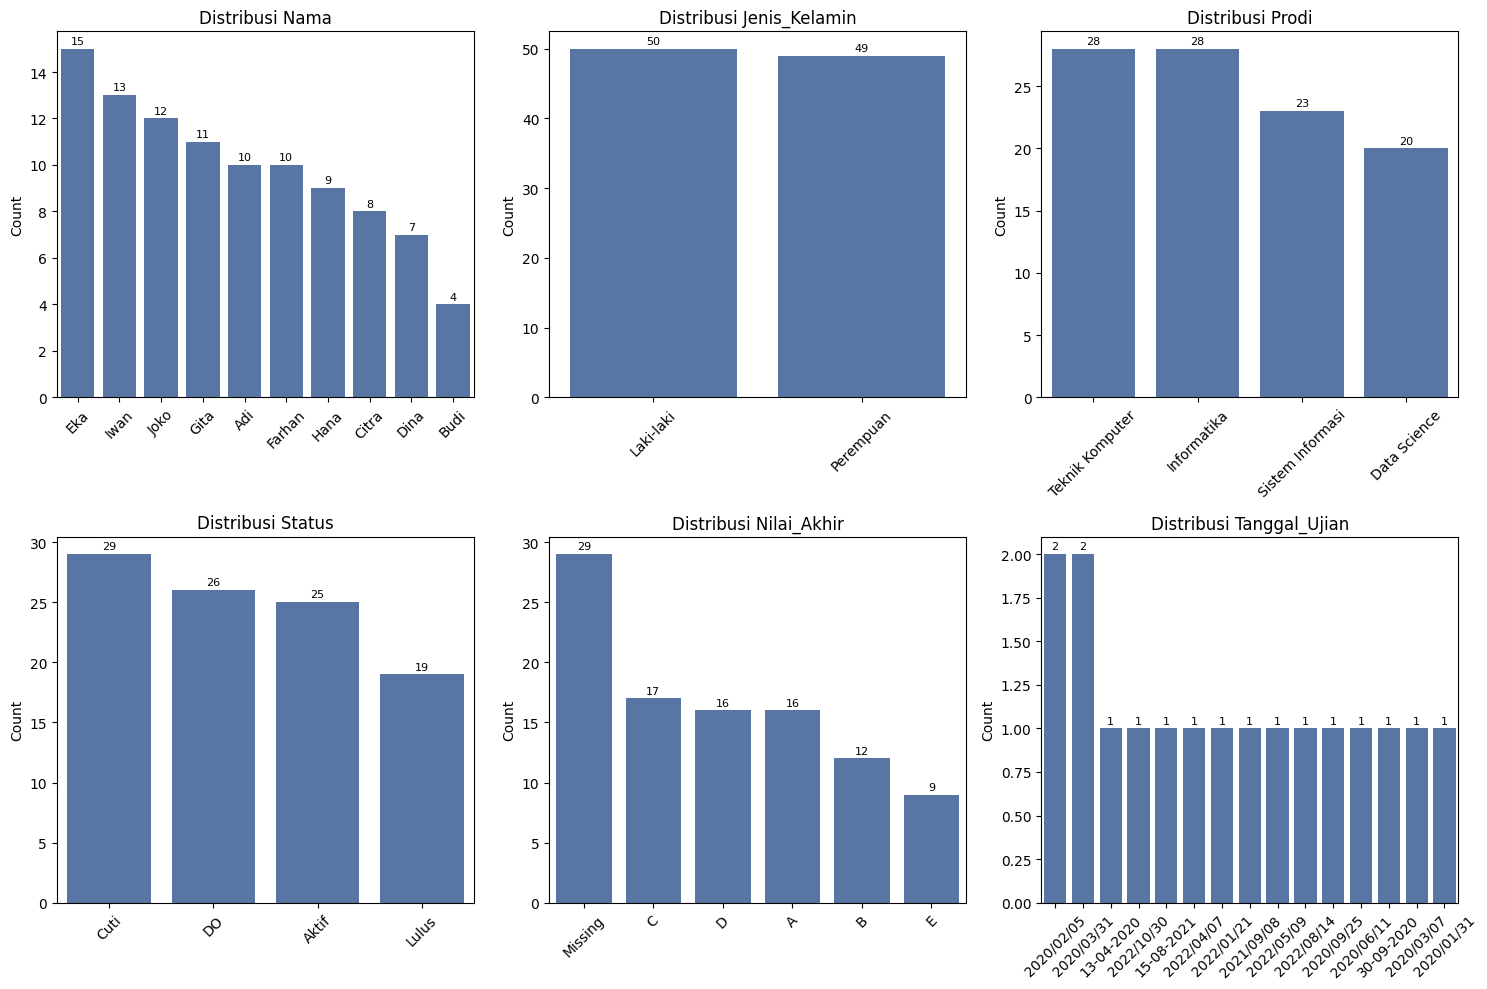

In [ ]:
# Distribusi kolom kategorikal dalam satu figure (subplots)
if len(cat_cols) == 0:
    print("Tidak ada kolom kategorikal.")
else:
    _cols = list(cat_cols)
    _nplots = len(_cols)
    _ncols = min(3, _nplots)
    _nrows = (_nplots + _ncols - 1) // _ncols

    fig, axes = plt.subplots(_nrows, _ncols, figsize=(5 * _ncols, 5 * _nrows))
    axes = np.array(axes).reshape(-1)  # flatten safely

    for i, col in enumerate(_cols):
        s = df[col].fillna('Missing').astype(str).value_counts()
        if s.size > 15:
            s = s.head(15)  # batasi agar lebih terbaca

        sns.barplot(x=s.index, y=s.values, ax=axes[i], color="#4c72b0")
        axes[i].set_title(f"Distribusi {col}")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)

        for p, v in zip(axes[i].patches, s.values):
            axes[i].annotate(
                str(v),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, xytext=(0, 2), textcoords='offset points'
            )

    # Sembunyikan subplot yang tidak terpakai
    for j in range(_nplots, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# TAHAP 3

## 3A. IMPUTASI NILAI

In [88]:
# Imputasi nilai kosong

# 1) Kategorikal: Nilai_Akhir -> modus (kategori paling sering)
mode_nilai_akhir = df['Nilai_Akhir'].mode()[0]
df['Nilai_Akhir'].fillna(mode_nilai_akhir, inplace=True)

# 2) Numerik: Umur -> median (lebih robust terhadap outlier)
median_umur = df['Umur'].median()
df['Umur'].fillna(median_umur, inplace=True)

In [89]:
# Tampilkan jumlah nilai hilang per kolom
missing_counts = df.isna().sum()
missing_counts

ID               0
Nama             0
Jenis_Kelamin    0
Prodi            0
Status           0
Nilai_Akhir      0
Tanggal_Ujian    0
Umur             0
dtype: int64

# TAHAP 4

## 4A. TANGGAL UJIAN TERKONFIRMASI DALAM FORMAT TANGGAL

In [90]:
# Konversi kolom tanggal (format awal yy/mm/dd), dengan fallback format lain yang ada di data
col = 'Tanggal_Ujian' 
parsed = pd.to_datetime(df[col], format='%y/%m/%d', errors='coerce')

# Fallback: YYYY/MM/DD
mask = parsed.isna()
if mask.any():
    parsed.loc[mask] = pd.to_datetime(df.loc[mask, col], format='%Y/%m/%d', errors='coerce')

# Fallback: DD-MM-YYYY
mask = parsed.isna()
if mask.any():
    parsed.loc[mask] = pd.to_datetime(df.loc[mask, col], format='%d-%m-%Y', errors='coerce')

df['Tanggal_Ujian_Parsed'] = parsed
print(f"Konversi selesai. Tidak ter-parse: {df['Tanggal_Ujian_Parsed'].isna().sum()}")

Konversi selesai. Tidak ter-parse: 0


In [91]:
df[['Tanggal_Ujian', 'Tanggal_Ujian_Parsed']].head(10)

,Tanggal_Ujian,Tanggal_Ujian_Parsed
0,13-04-2020,2020-04-13
1,2020/12/11,2020-12-11
2,2021/11/21,2021-11-21
3,2021/08/19,2021-08-19
4,2020/01/05,2020-01-05
5,2021/10/15,2021-10-15
6,2020/01/15,2020-01-15
7,2020/09/16,2020-09-16
8,2021/02/06,2021-02-06
9,2020/02/12,2020-02-12


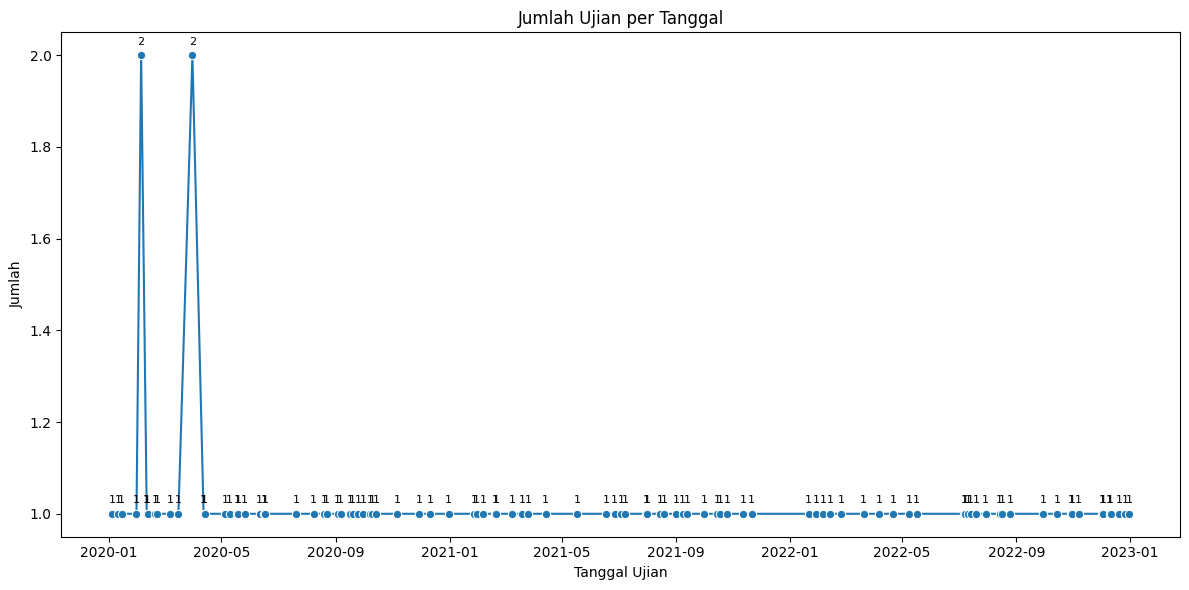

In [92]:
# Tambahkan label nilai pada tiap titik
def label_points(x, y, ax=None):
    ax = ax or plt.gca()
    for i in range(len(x)):
        ax.text(x[i], y[i], str(y[i]), fontsize=8, ha='center', va='bottom')
counts_by_date = (
    df.dropna(subset=['Tanggal_Ujian_Parsed'])
      .groupby('Tanggal_Ujian_Parsed')
      .size()
      .reset_index(name='Jumlah')
      .sort_values('Tanggal_Ujian_Parsed')
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=counts_by_date, x='Tanggal_Ujian_Parsed', y='Jumlah', marker='o')
plt.title('Jumlah Ujian per Tanggal')
plt.xlabel('Tanggal Ujian')
plt.ylabel('Jumlah')
plt.grid(False)
plt.tight_layout()
plt.show()

# TAHAP 5

## 5A. LABEL ENCODING

In [93]:
# Cetak nilai unik untuk setiap kolom yang diminta
cols = ['Nama', 'Jenis_Kelamin', 'Prodi', 'Status', 'Nilai_Akhir']

for col_name in cols:
    if col_name in df.columns:
        vals = pd.unique(df[col_name].dropna())
        print(f"{col_name} ({len(vals)}): {', '.join(sorted(map(str, vals)))}")
    else:
        print(f"Kolom '{col_name}' tidak ditemukan di DataFrame.")

Nama (10): Adi, Budi, Citra, Dina, Eka, Farhan, Gita, Hana, Iwan, Joko
Jenis_Kelamin (2): Laki-laki, Perempuan
Prodi (4): Data Science, Informatika, Sistem Informasi, Teknik Komputer
Status (4): Aktif, Cuti, DO, Lulus
Nilai_Akhir (5): A, B, C, D, E


In [94]:
map_nama = {name: idx for idx, name in enumerate(sorted(df['Nama'].unique()))}
map_jenis_kelamin = {'Laki-laki': 0, 'Perempuan': 1}
map_prodi = {prodi: idx for idx, prodi in enumerate(sorted(df['Prodi'].unique()))}
map_status = {status: idx for idx, status in enumerate(sorted(df['Status'].unique()))}
map_nilai_akhir = {
    'A': 4,
    'A-': 3.7,
    'B+': 3.3,
    'B': 3,
    'B-': 2.7,
    'C+': 2.3,
    'C': 2,
    'C-': 1.7,
    'D+': 1.3,
    'D': 1,
    'E': 0
}

In [100]:
map_nama

{'Adi': 0,
 'Budi': 1,
 'Citra': 2,
 'Dina': 3,
 'Eka': 4,
 'Farhan': 5,
 'Gita': 6,
 'Hana': 7,
 'Iwan': 8,
 'Joko': 9}

In [101]:
map_prodi

{'Data Science': 0,
 'Informatika': 1,
 'Sistem Informasi': 2,
 'Teknik Komputer': 3}

In [102]:
map_status

{'Aktif': 0, 'Cuti': 1, 'DO': 2, 'Lulus': 3}

In [95]:
df['Nama']=df['Nama'].map(map_nama)
df['Jenis_Kelamin']=df['Jenis_Kelamin'].map(map_jenis_kelamin)
df['Prodi']=df['Prodi'].map(map_prodi)
df['Status']=df['Status'].map(map_status)
df['Nilai_Akhir']=df['Nilai_Akhir'].map(map_nilai_akhir)

# TAHAP 6

## 6A. TRAIN TEST SPLIT

In [103]:
Y=df['Nilai_Akhir']
X=df.drop(columns=['ID', 'Nama', 'Nilai_Akhir', 'Tanggal_Ujian', 'Tanggal_Ujian_Parsed'])

In [104]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## ATAU KALAU BELUM DITENTUKAN VARIABEL TARGETNYA DALAM SOAL MAKA

In [107]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# TAHAP 7

## 7A. HISTOGRAM UMUR

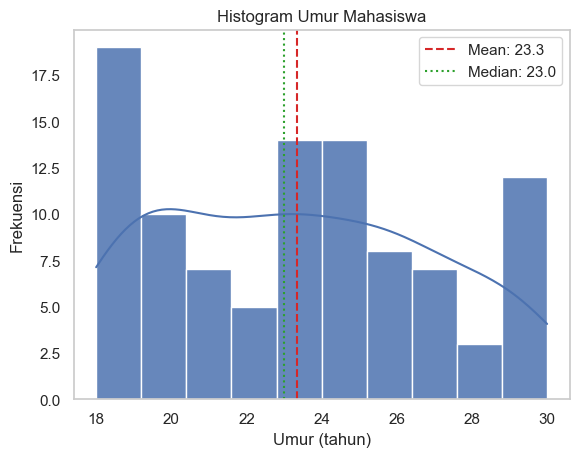

In [111]:
sns.set_theme(style='whitegrid')

ax = sns.histplot(data=df, x='Umur', bins=10, kde=True,
                  color='#4C72B0', edgecolor='white', alpha=0.85)

mean_umur = df['Umur'].mean()
median_umur = df['Umur'].median()
plt.axvline(mean_umur, color='#D62728', linestyle='--', linewidth=1.5, label=f"Mean: {mean_umur:.1f}")
plt.axvline(median_umur, color='#2CA02C', linestyle=':', linewidth=1.5, label=f"Median: {median_umur:.1f}")

plt.xlabel('Umur (tahun)')
plt.ylabel('Frekuensi')
plt.legend()
plt.title('Histogram Umur Mahasiswa')
plt.grid(False)

## 7B. BARPLOT JUMLAH PRODI

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


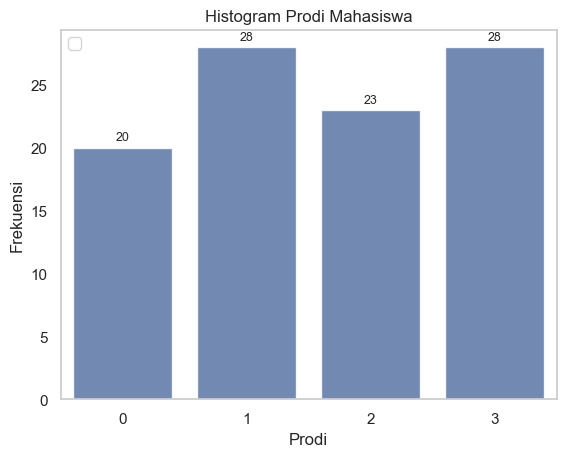

In [119]:
sns.set_theme(style='whitegrid')

ax = sns.barplot(x=df['Prodi'].value_counts().index, y=df['Prodi'].value_counts().values, alpha=0.85)


# Tambahkan label jumlah pada setiap batang
for p in ax.patches:
    h = p.get_height()
    ax.annotate(f"{int(h)}", (p.get_x() + p.get_width() / 2, h),
                ha='center', va='bottom', fontsize=9, xytext=(0, 3), textcoords='offset points')
plt.xlabel('Prodi')
plt.ylabel('Frekuensi')
plt.legend()
plt.title('Histogram Prodi Mahasiswa')
plt.grid(False)

Text(0.5, 1.0, 'Jumlah Mahasiswa per Prodi')

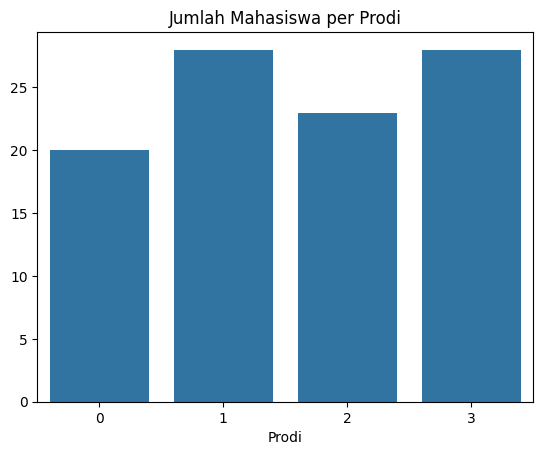

In [109]:
sns.barplot(x=df['Prodi'].value_counts().index, y=df['Prodi'].value_counts().values)
plt.title('Jumlah Mahasiswa per Prodi')